# Gege Mayrendra

## Data Science Hck-04

# Working Area

## Problem Statement

`Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.`

## Objective
- `what is the distribution of churn risk score?`


### Import Libraries
- `Importing data that we use during our project along with the library`
- `distribution age of customer`
- `churn score by gender?`
- `membership category into churn score?`
- `churn score affected by feedback?`
- `churn score related by internet option?`
- `does past complaint affected churn score?`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from phik.report import plot_correlation_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
import pickle

## Data Loading

`we import our csv and inspect the characteristic from the dataset before we explore more`

`first we need to import drive in order to connect our dataset in google drive into google colaboratory`

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive


/content/drive/My Drive


`setting up the the display into showing all the columns`

In [4]:
pd.set_option('display.max_columns', None)

`we need to reading our dataset and assigning into df variable, at this moment we also using function to separate the possibility missing value in dataset`

In [5]:
churn = pd.read_csv('churn.csv',na_values=[' ', '-', '?' ,'n/a', 'na', '--'])


`calling the dataframe`

In [6]:
churn

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


`checking the rows and columns using .shape`

In [7]:
churn.shape

(37010, 22)

`its a pretty big dataset, now checking if there is a chance this dataset has a duplicated rows using .duplicated`

In [8]:
churn[churn.duplicated()].shape

(18, 22)

`now we know there are 18 rows that has been duplicated`

`showing the head, tail and sample of dataset churn`

In [9]:
churn.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [10]:
churn.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [11]:
churn.sample(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
35841,b84f571384fe5c69,41,M,NaN,No Membership,2016-11-06,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,05:57:37,15,112.27,33329.03,16.0,686.43,Yes,No,Yes,Solved,Poor Website,1
5870,8a917aee7af9ac64,29,M,City,Platinum Membership,2016-04-07,NaN,Gift Vouchers/Coupons,Desktop,Fiber_Optic,17:21:49,2,52.17,90045.71,1.0,750.59,Yes,No,Yes,Solved,Products always in Stock,0
12762,9c1513e223b98129,36,M,Town,Basic Membership,2017-03-07,Yes,Without Offers,Smartphone,Mobile_Data,14:47:23,7,60.06,7460.08,14.0,668.12,Yes,No,Yes,Unsolved,Poor Customer Service,1
34217,81da9776d74bac82,33,M,City,Platinum Membership,2016-06-08,Yes,Without Offers,Smartphone,Wi-Fi,06:46:41,11,33.64,96835.25,16.0,753.28,Yes,No,No,Not Applicable,Reasonable Price,0
5494,8b6509dc74b7db9b,32,F,City,No Membership,2016-11-25,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,13:45:45,21,45.91,28584.51,7.0,622.26,Yes,No,Yes,Unsolved,No reason specified,1


`we willing to know the information of this dataset in general using .info`

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

`from .info, now we know that this datset is consist from 3 dtypes int64, 15 dtype objects and 4 dtypes float64. now we use .describe to know the mean, Q1, Q2 and etc from this dataset`

In [13]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


`we got an big issue in days since last login, most of customer has not logged into their account for 41 days, this is indicate that our customer doesnt feel emotional attract with our website anymore. and this problem should be the key of our sugesstion`

`we need to check if the dataset has been contained with missing value, so we use isnull.sum to check the dataset in general`

In [14]:
churn.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

`this dataset apparently contains missing value in 5 columns, 3 of them have a significant miising value which is region category, joined through referal and medium of operation with missing value more than 5000`

`making the missing value of each column into percentage`

In [15]:
churn.isnull().mean()

user_id                         0.000000
age                             0.000000
gender                          0.001594
region_category                 0.146744
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.147041
preferred_offer_types           0.007782
medium_of_operation             0.145771
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.000000
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score                0.000000
dtype: float64

`the missing value for these 3 columns spend more than 10% of all the data in general. we will handle it for our next processing`

## Exploratory Data Analysis (EDA)

`in this section we will observe and visualize the data deeper`

- `what is the distribution of churn risk score?`

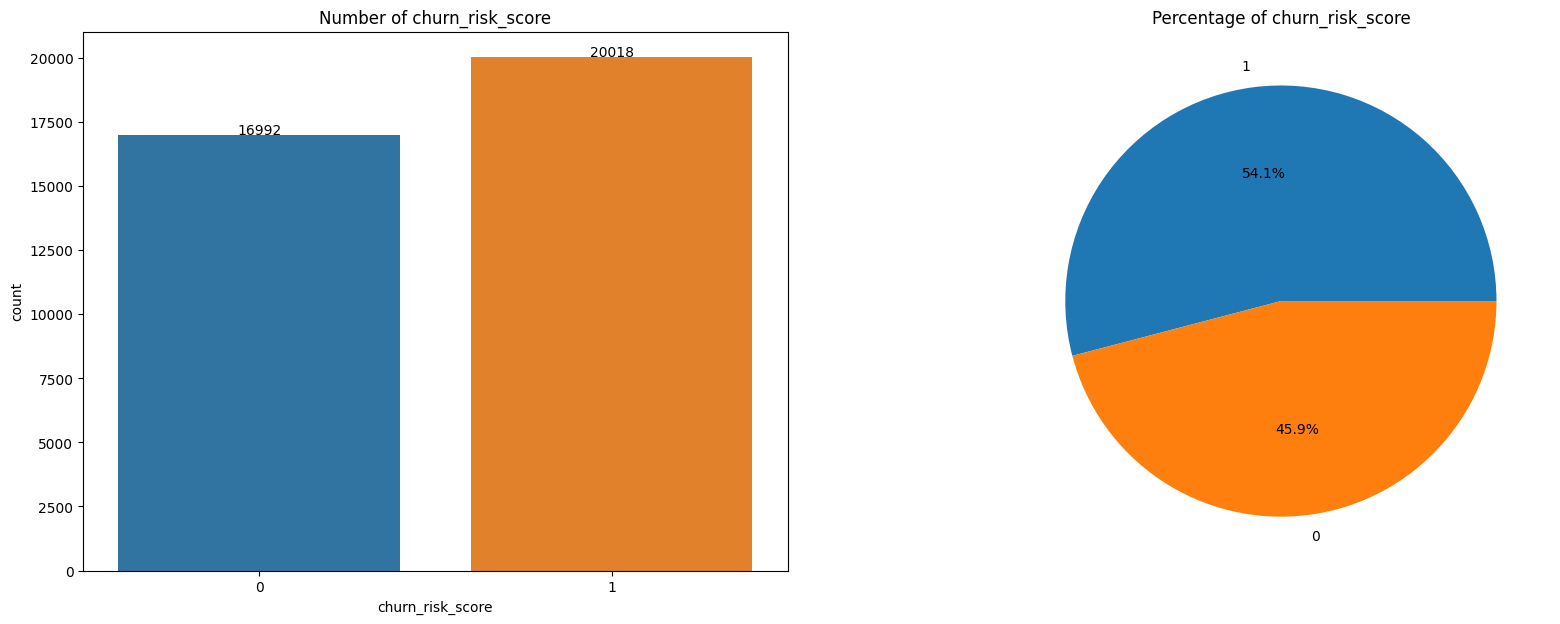

In [16]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fig = sns.countplot(x = 'churn_risk_score',data= churn)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")
plt.title('Number of churn_risk_score')

plt.subplot(1,2,2)
plt.pie(churn.churn_risk_score.value_counts(), labels= churn.churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of churn_risk_score')
plt.show()

`from bar plot above we already know that 1 is represent as custmer who is churn and the other one is not. 20018 customer has decided to churn than number zero that only has 16992. this is indicates our data could be recognized as a balance data and if we make it into percentages, number 1 has 54.1% than number 0 has 45.9%`

- `distribution age of customer`

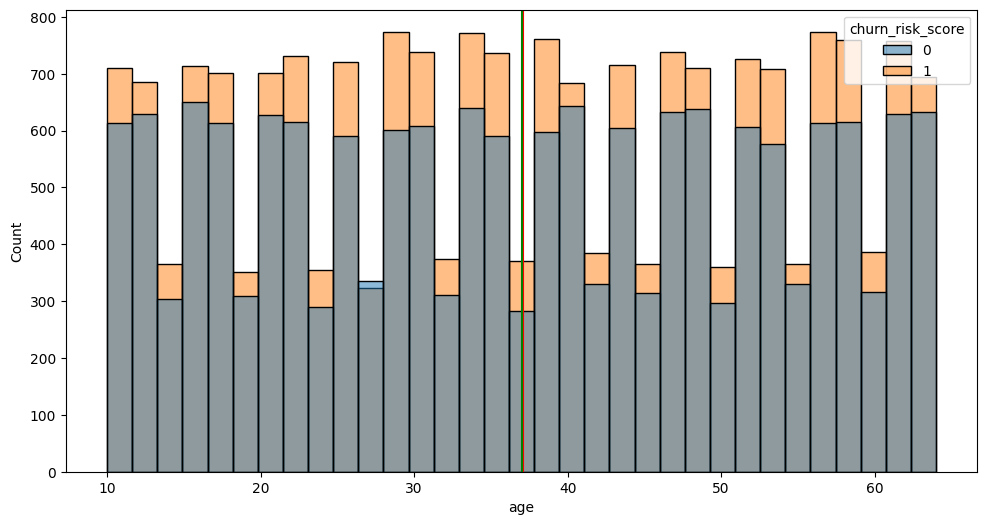

In [17]:
plt.figure(figsize=(40,6))
plt.subplot(1,3,1)
sns.histplot(x = 'age', hue='churn_risk_score', data= churn)
plt.axvline(churn.age.mean(), color = 'r', label = 'Mean')
plt.axvline(churn.age.median(), color = 'g', label = 'Median')

`our customer has huge range of age, the youngest start from 10 years old and the oldest is more than 60 years old. red line means the average of age and the green line means mode of age column. these 2 line huddle around 38 years old. the orange line bar is represent as customer who churn and the blue one is customer that are loyal. from bar above, at many age, customer tendly to churn.`

- `churn score by gender?`

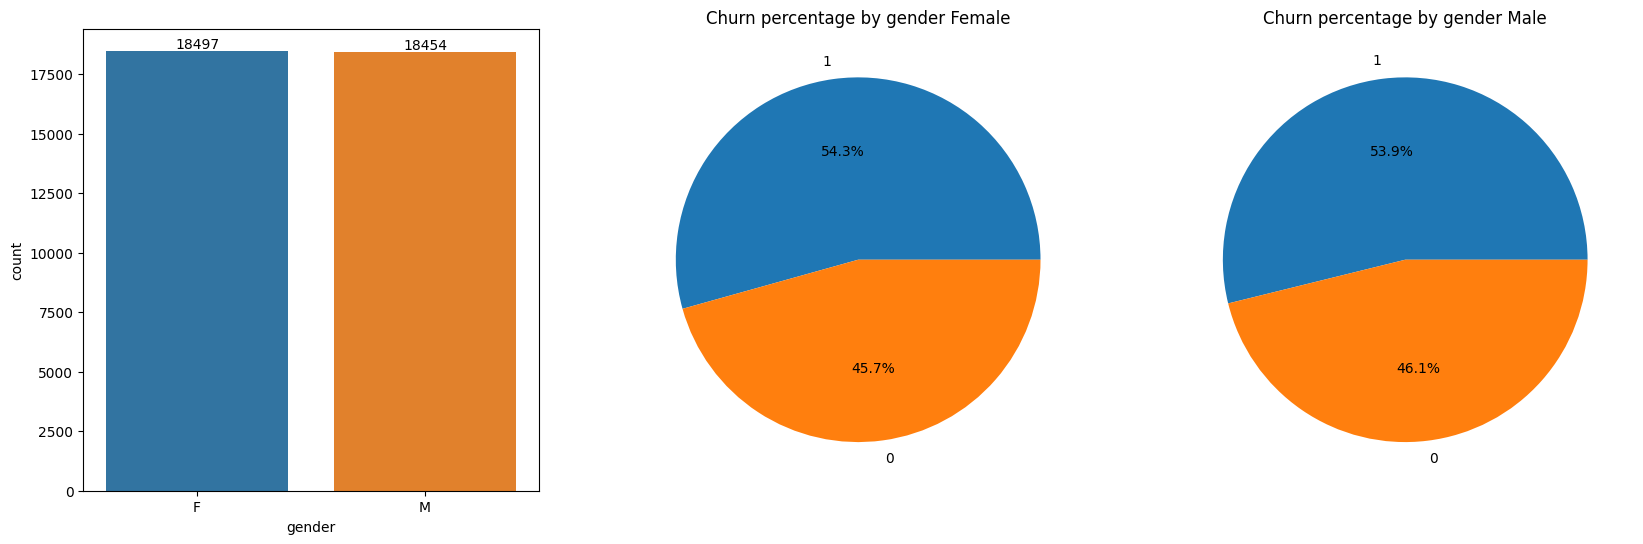

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='gender', data = churn)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(churn[churn.gender == 'F'].churn_risk_score.value_counts(), labels= churn[churn.gender == 'F'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by gender Female')

plt.subplot(1,3,3)
plt.pie(churn[churn.gender == 'M'].churn_risk_score.value_counts(), labels= churn[churn.gender == 'M'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by gender Male')
plt.show()

`we got female and male population kinda balance in this data. but when we make it into percentage of churn, customer tend to be not loyal enough of our company. female has 54.3% to churn and male 53.9 to churn`

- `membership category into churn score?`

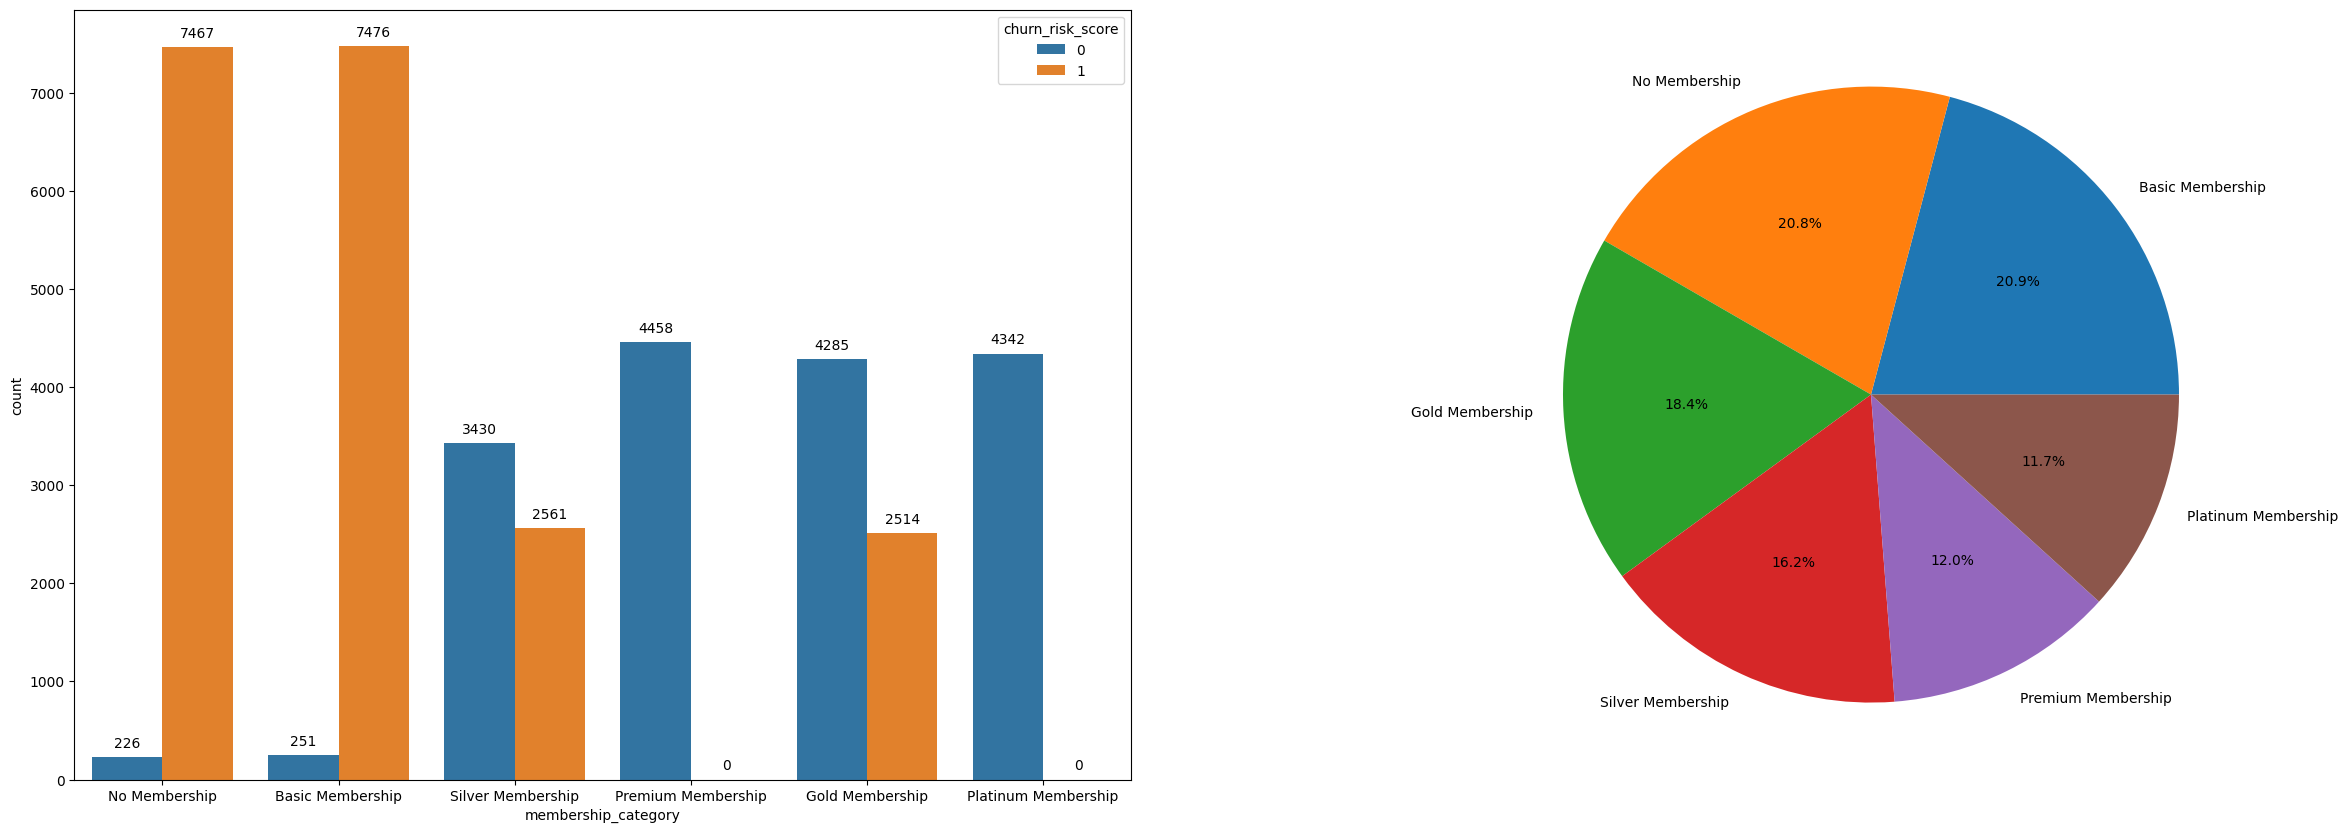

In [19]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='membership_category', hue='churn_risk_score', data = churn)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(churn.membership_category.value_counts(), labels= churn.membership_category.value_counts().index, autopct = '%1.1f%%')
plt.show()

`the biggest folk in our data customer is they are wo dont have membership or no membership. whne we look into membership category affected churn score, we got the result that most of customer who are not loyal are come from no membership and basic membership section. but for premium and platinum membership, the churn score is zero`

- `churn score affected by feedback?`

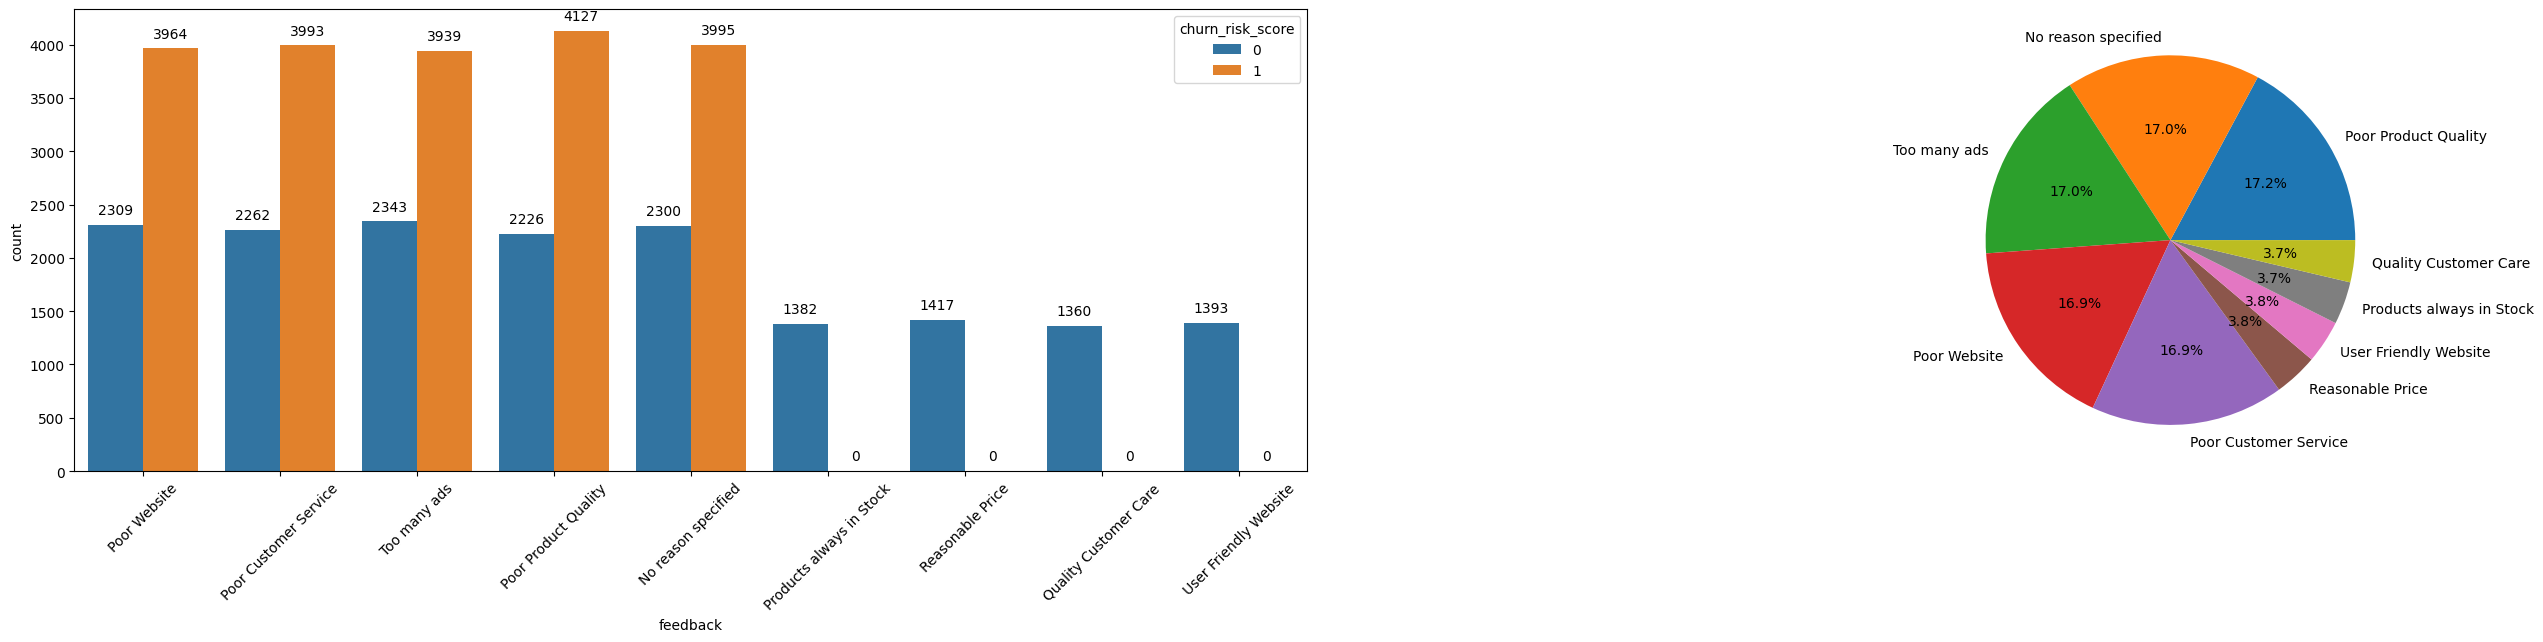

In [20]:
plt.figure(figsize=(35,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='feedback', hue='churn_risk_score', data=churn)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 100, '{:1.0f}'.format(height), ha="center")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # rotate the x-tick labels by 45 degrees

plt.subplot(1,2,2)
plt.pie(churn.feedback.value_counts(), labels=churn.feedback.value_counts().index, autopct='%1.1f%%')
plt.show()

`as we can see from bar and pie char above, many customer who has highly churn score are coming for bad feedback segmention. this is really defferent when we look into good feedback segmention, no one has indicates as churn. but in general, most of feeedback are categorized as bad feedback`

- `churn score related by internet option?`

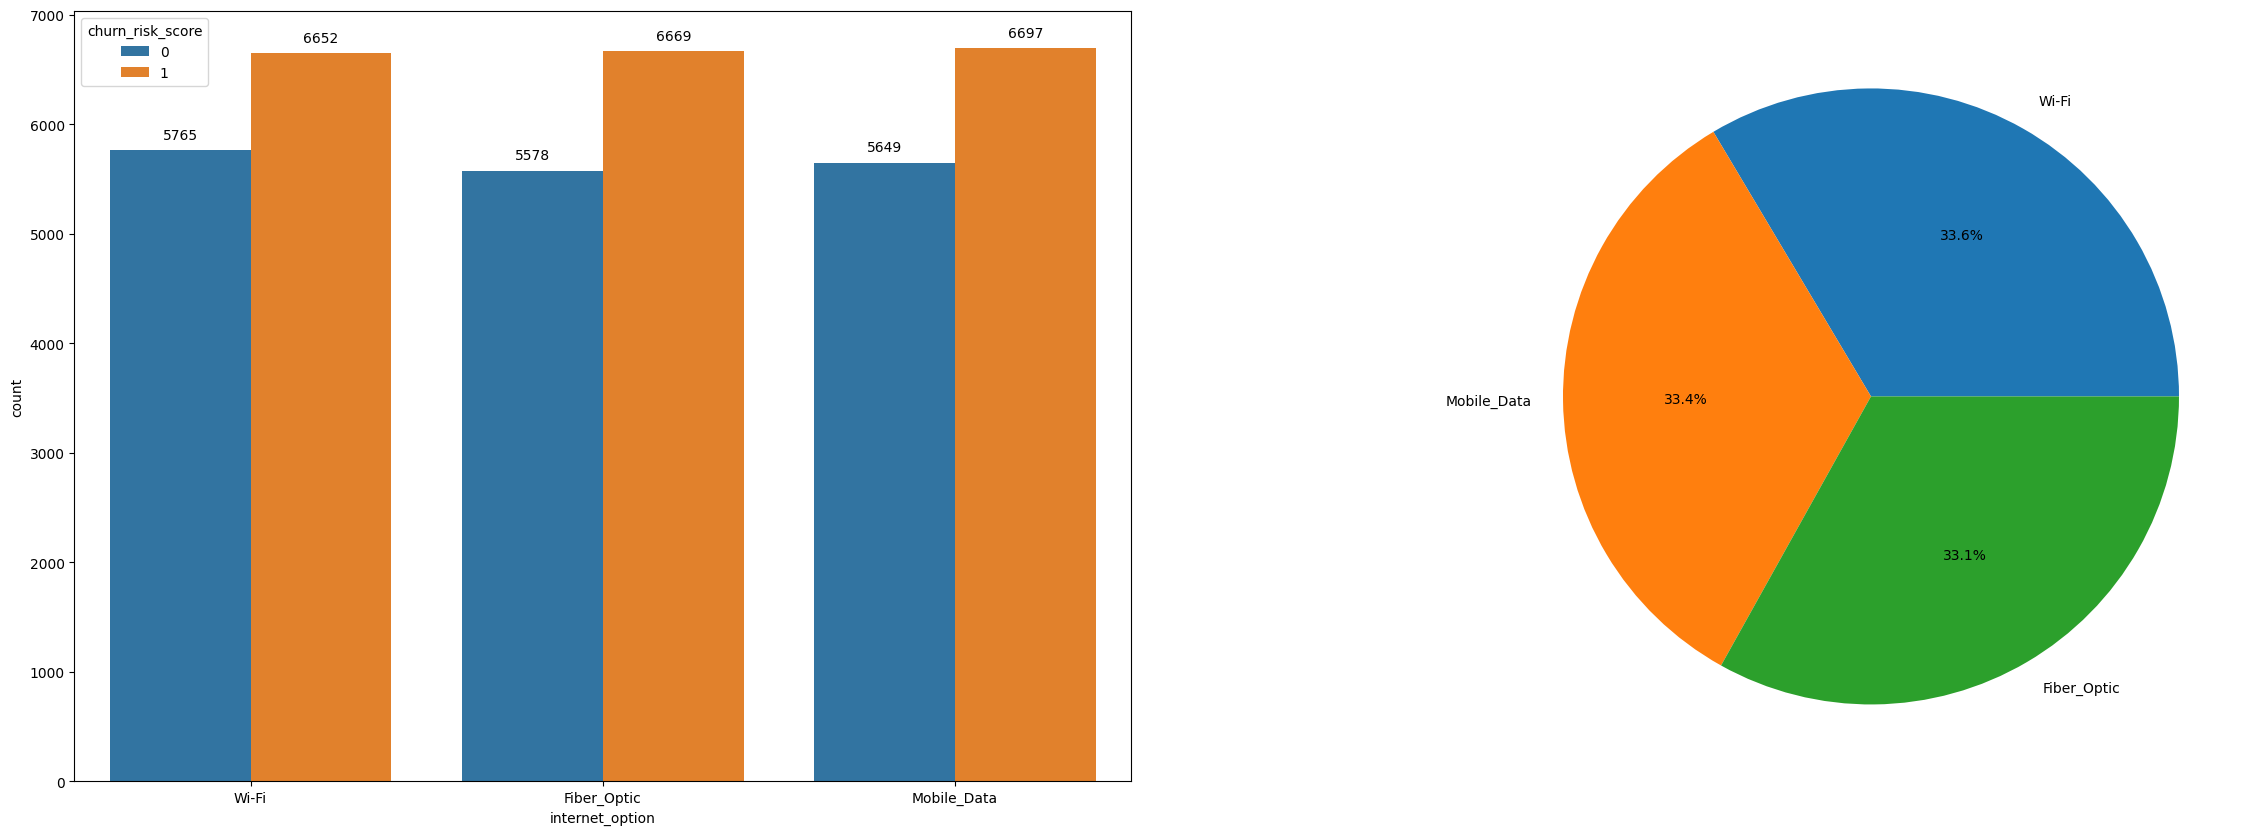

In [21]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='internet_option', hue='churn_risk_score', data = churn)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(churn.internet_option.value_counts(), labels= churn.internet_option.value_counts().index, autopct = '%1.1f%%')
plt.show()

`it seems like whatever our customer  internet option, the churn score always happens in all of the segment`

- `does past complaint affected churn score?`

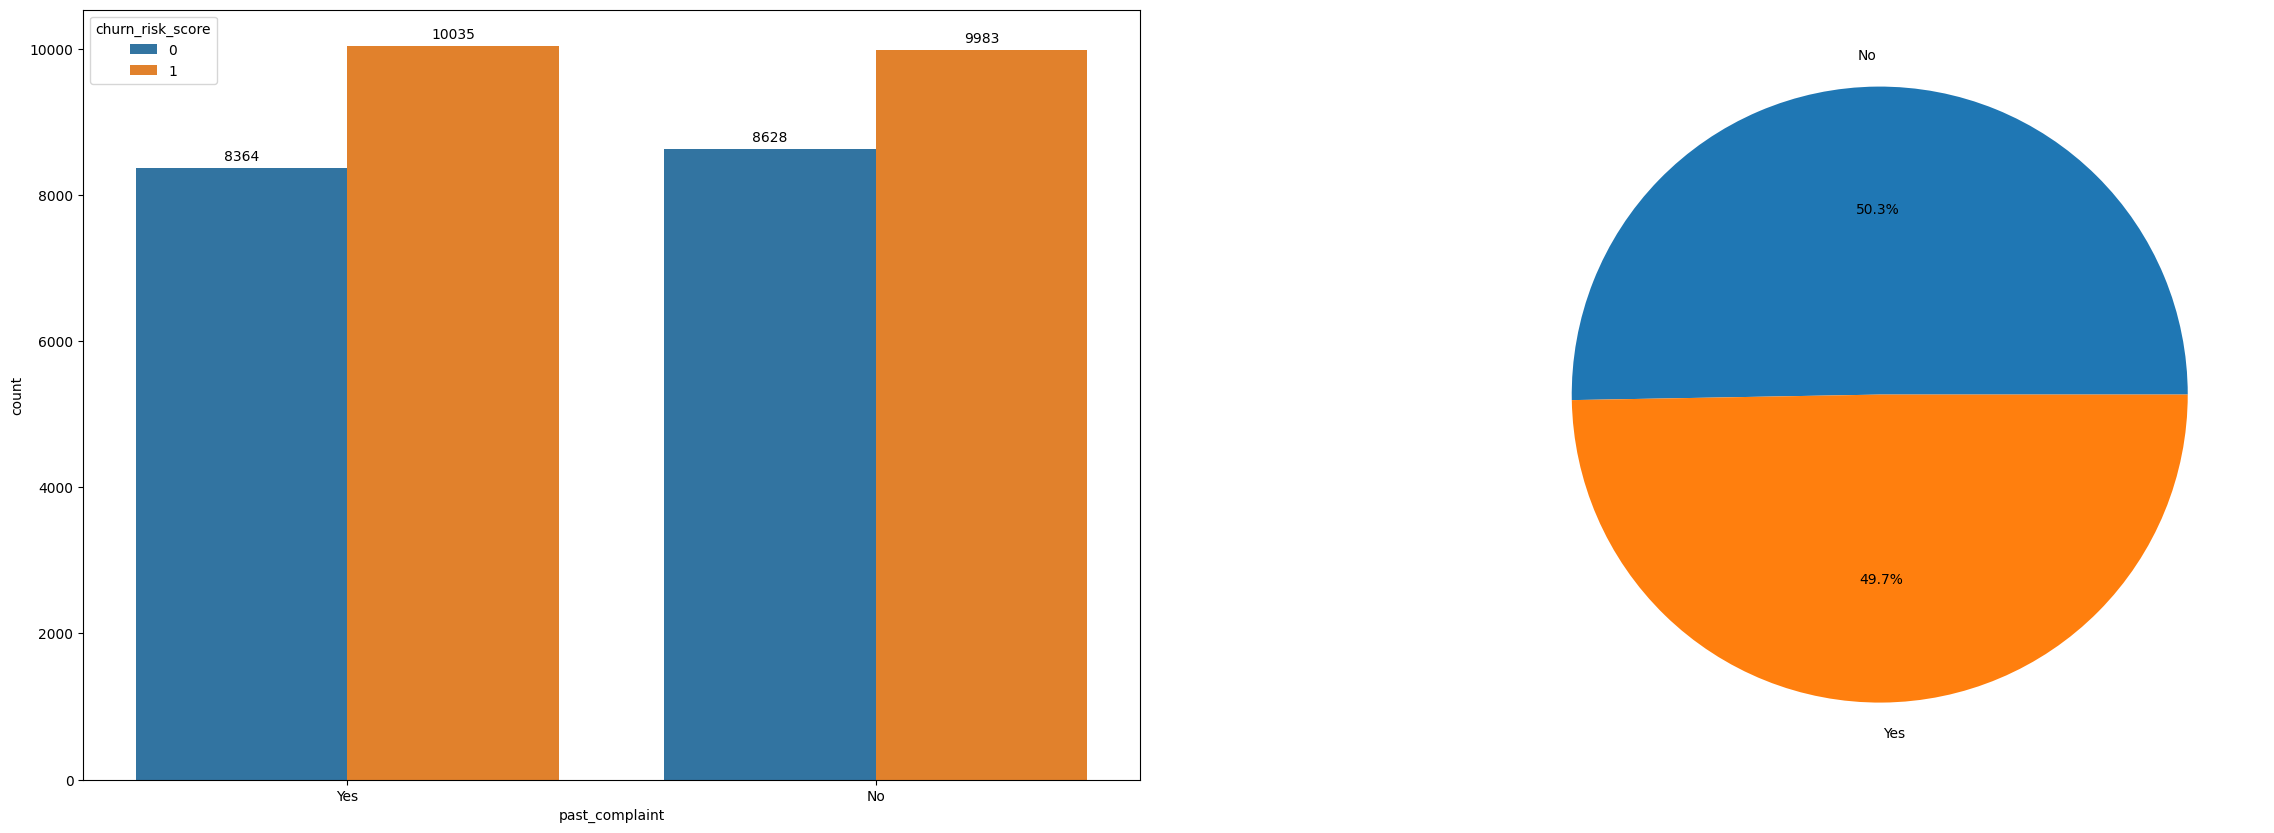

In [22]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='past_complaint', hue='churn_risk_score', data = churn)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(churn.past_complaint.value_counts(), labels= churn.past_complaint.value_counts().index, autopct = '%1.1f%%')
plt.show()

`it suprisingly doesnt affected churn score. whenever customer has given a complaint or not, the churn always happens in these 2 segments. when we make it into percentage, it equals`

### Correlation

`comparing each columns to see the correlation into target`

`i personally has 0.1 correlation as my treshold, so i will choose the columns who has correlation score above treshold as my feature`

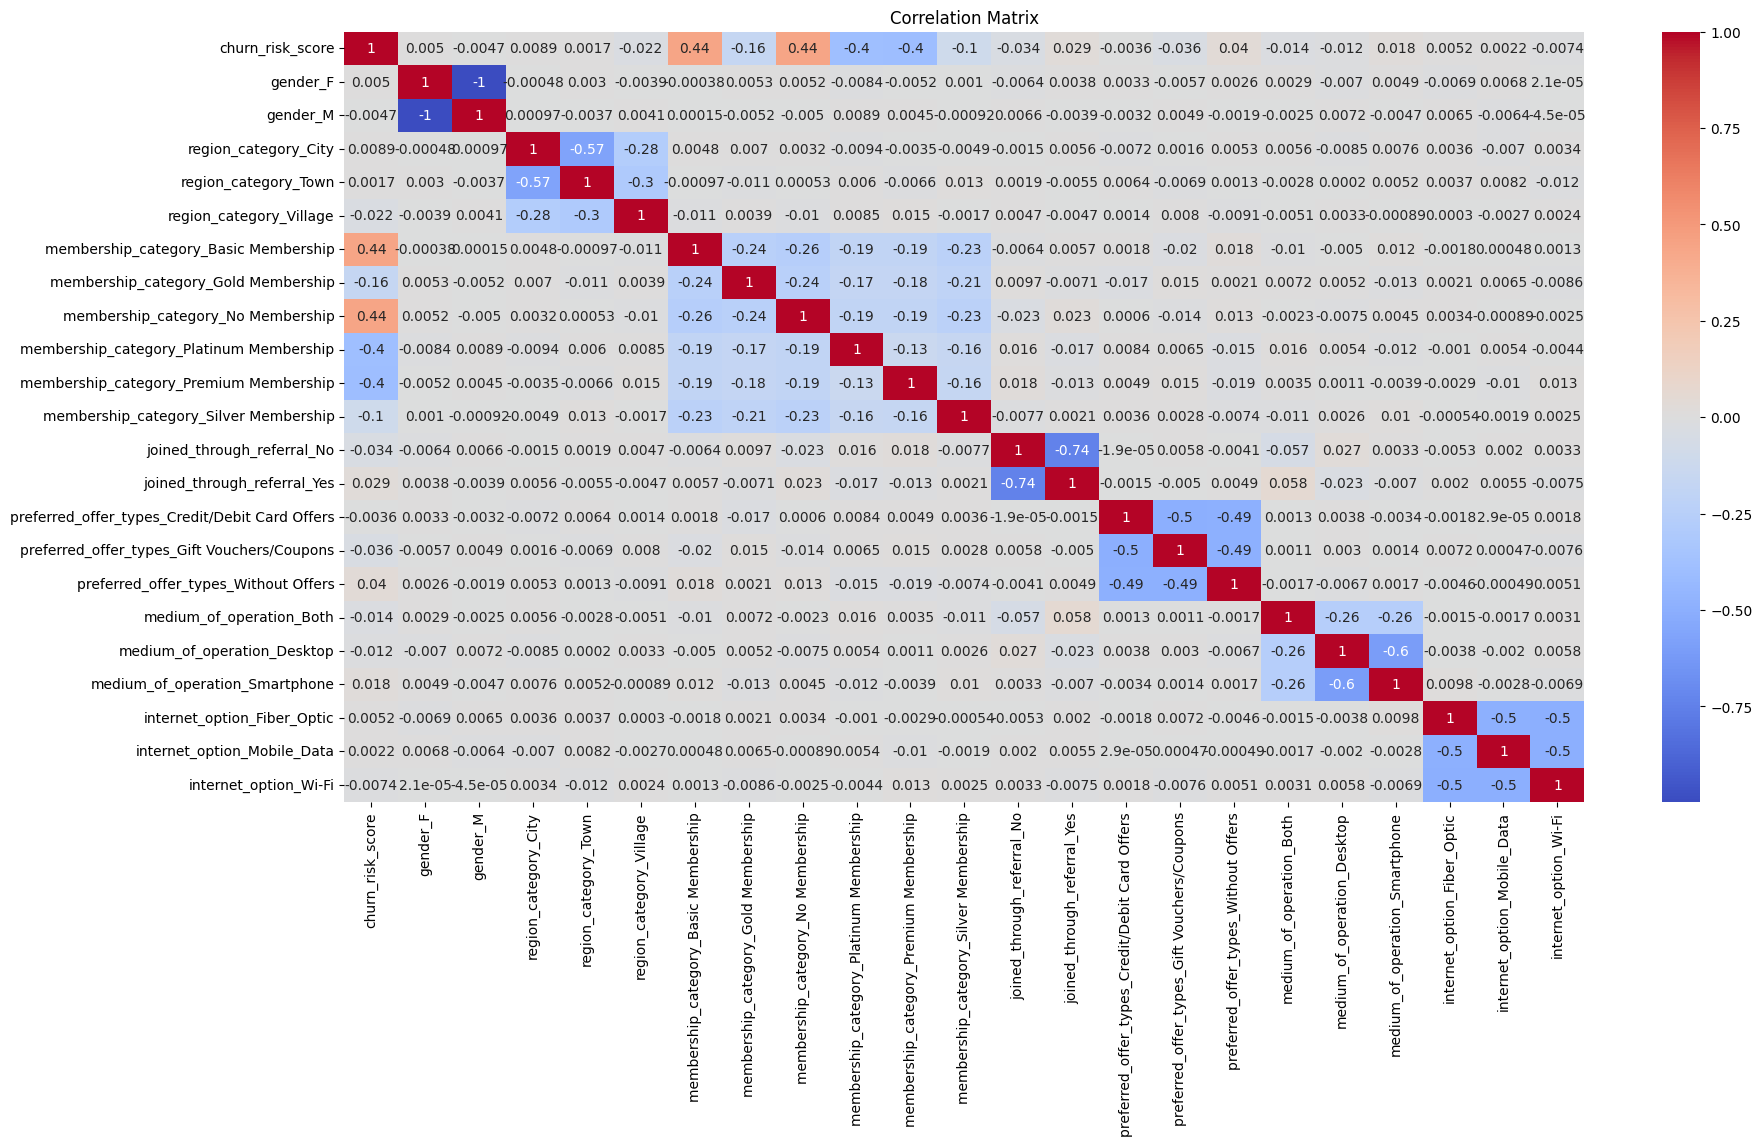

In [23]:
corr = pd.concat([churn[['churn_risk_score']], \
                 pd.get_dummies(churn[['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option']])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

`from this first correlation, the only columns who has score above threshold is only membership`

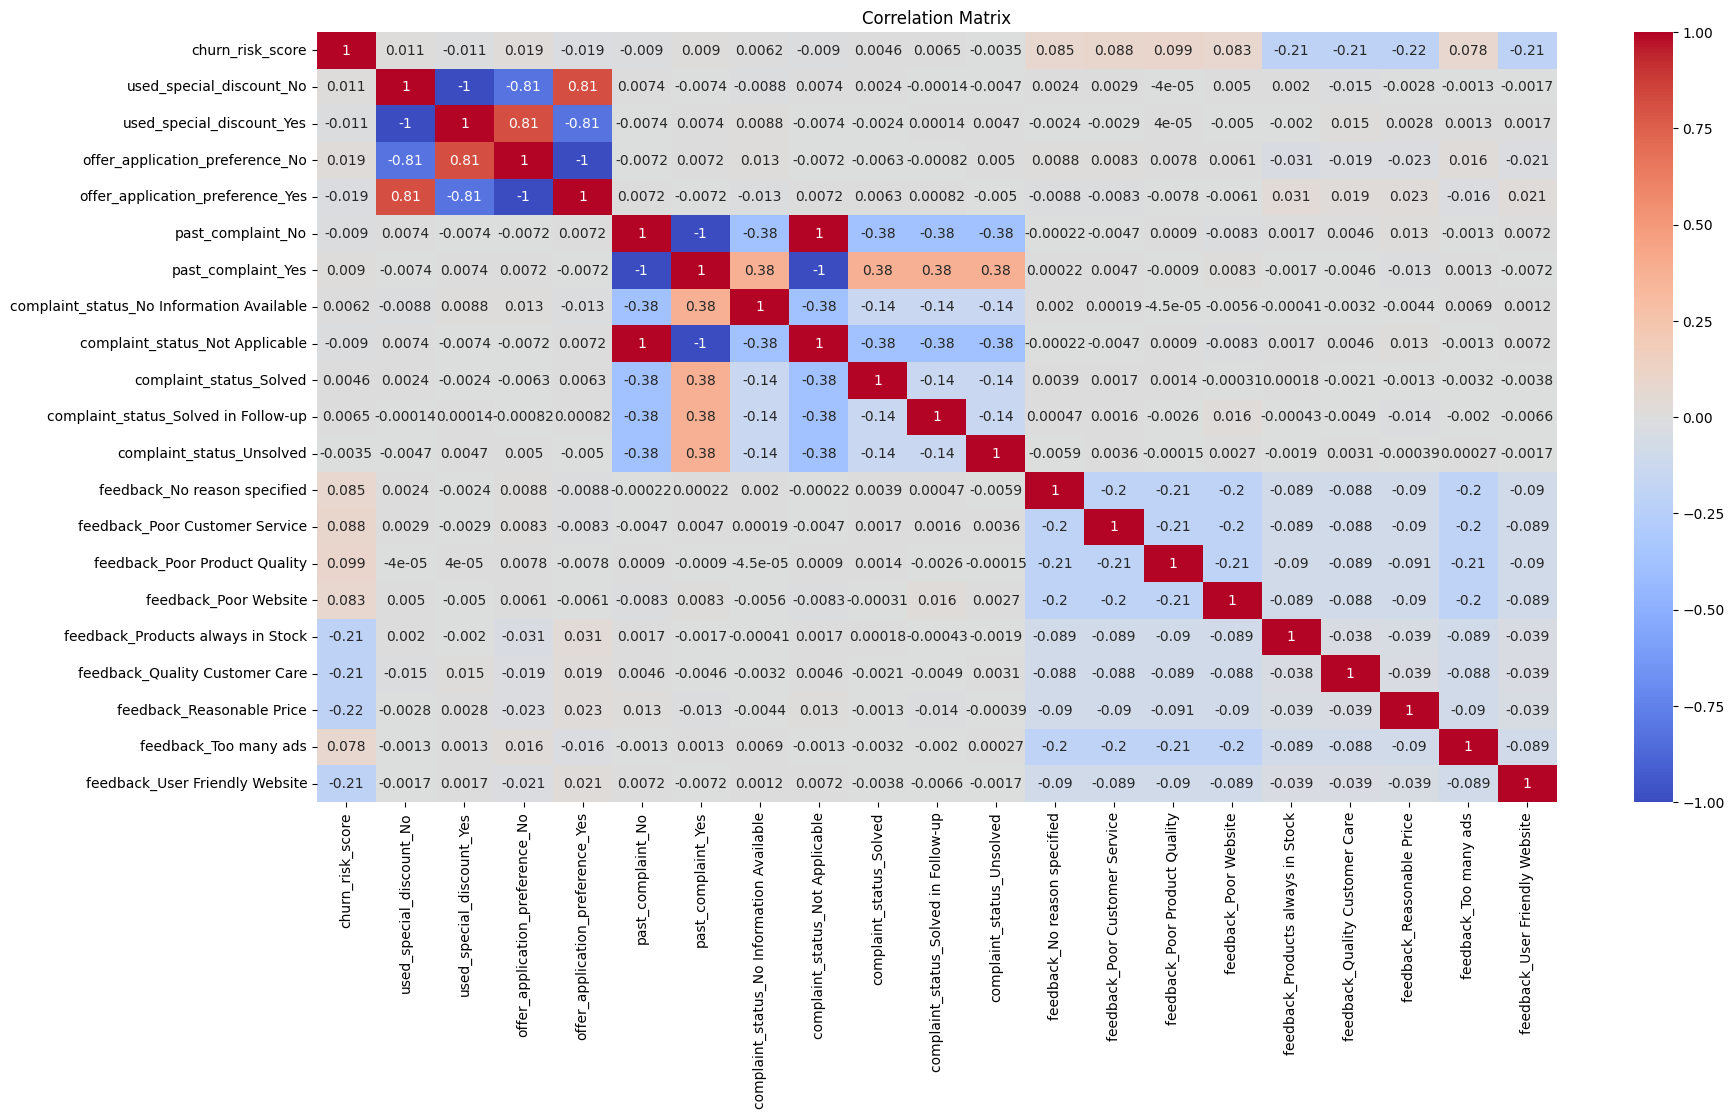

In [24]:
corr = pd.concat([churn[['churn_risk_score']], \
                 pd.get_dummies(churn[['used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

`from this second correlation, the only columns who has score above threshold is only feedback`

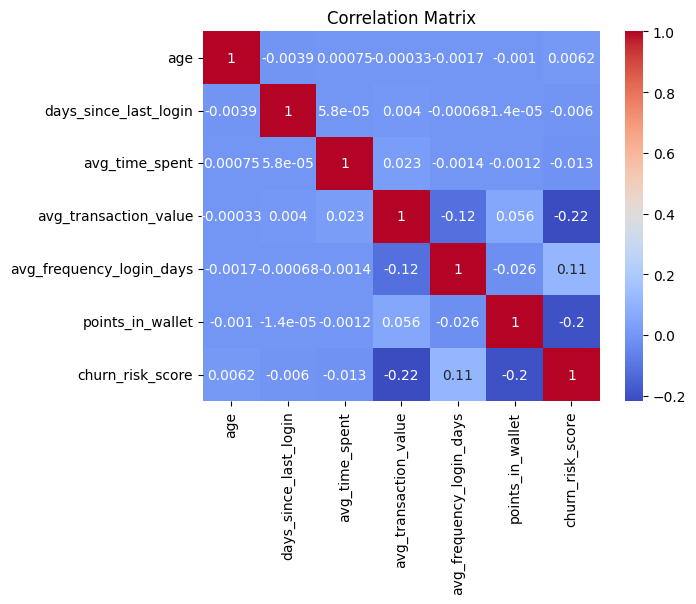

In [25]:
corr = churn.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

`from this third correlation, the only columns who has score above threshold is only average frequency login days`

`after seeing the correlation column, we make a new variable consist by selected features`

In [79]:
churn_fix = churn[['membership_category','feedback','avg_frequency_login_days','churn_risk_score']]

### Handling Missing Value

`analyzing missing value into missing value pattern for those missing value columns`

In [26]:
churn[pd.isna(churn['gender'])]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
22,be55c26b06eeb561,54,NaN,City,Basic Membership,2017-03-18,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,12:34:37,13,156.07000,32463.61,16.000000,639.820000,Yes,No,Yes,No Information Available,Poor Product Quality,1
145,a159641a5f8deac9,47,NaN,Town,Silver Membership,2015-04-20,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,02:55:43,13,262.65000,35934.73,19.000000,784.300000,Yes,Yes,Yes,Solved,Poor Website,0
728,b85b3149c460cd02,40,NaN,City,Silver Membership,2017-01-01,No,Without Offers,Desktop,Mobile_Data,10:11:30,14,333.25000,21440.09,18.000000,749.310000,Yes,No,No,Not Applicable,Products always in Stock,0
2304,94070fc001e5d60b,23,NaN,Village,Premium Membership,2017-10-28,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,10:18:06,17,93.88000,38875.53,22.000000,1181.889841,Yes,No,Yes,Unsolved,Poor Website,0
2586,8f54a6a4f89f7305,41,NaN,City,No Membership,2016-11-05,Yes,Without Offers,NaN,Fiber_Optic,14:28:42,13,52.11000,28298.29,6.000000,548.630000,No,Yes,Yes,Unsolved,Poor Product Quality,1
3926,8ace27a9d93861b0,13,NaN,Town,No Membership,2016-09-18,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,10:25:14,15,549.90000,15737.81,9.000000,573.000000,No,Yes,Yes,Unsolved,Too many ads,1
4023,9518edceea074d43,26,NaN,City,Basic Membership,2017-05-07,NaN,Without Offers,Smartphone,Wi-Fi,20:39:43,-999,259.82000,21380.00,0.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1
4328,8c8af015fb0c05cd,52,NaN,Town,Gold Membership,2017-08-03,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,07:16:18,23,128.28000,15277.33,28.000000,787.840000,Yes,No,Yes,Solved,Poor Customer Service,0
5912,8d67e181f8dac02a,53,NaN,Village,Basic Membership,2015-09-13,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,01:57:21,8,650.07000,26235.35,0.000000,532.600000,No,Yes,Yes,No Information Available,No reason specified,1
5979,b0eff1eecbf9eb56,18,NaN,NaN,Platinum Membership,2015-12-15,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,08:25:44,17,221.57000,12808.70,7.000000,0.000000,Yes,No,Yes,Solved in Follow-up,No reason specified,0


In [27]:
churn[pd.isna(churn['preferred_offer_types'])]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,23:32:55,-999,68.820000,28467.12,0.00000,0.000000,Yes,No,No,Not Applicable,Poor Customer Service,1
164,8770519c75c4b2d3,58,M,City,Silver Membership,2017-07-07,No,NaN,NaN,Mobile_Data,00:30:41,-999,173.870000,1045.85,24.00000,638.630000,No,Yes,No,Not Applicable,Too many ads,1
171,b42a19688ed2c20b,47,F,Town,No Membership,2017-07-20,No,NaN,Smartphone,Fiber_Optic,01:29:53,13,1033.552633,45197.88,7.00000,626.870000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
246,88c4c93b81513e57,63,M,City,Gold Membership,2017-08-19,Yes,NaN,Smartphone,Fiber_Optic,05:06:12,5,438.260000,21627.21,13.00000,784.750000,Yes,No,Yes,No Information Available,Poor Website,0
254,a0ce1bae55f27bae,10,M,Town,Gold Membership,2016-07-22,Yes,NaN,Desktop,Fiber_Optic,04:39:49,15,869.982709,29733.41,6.00000,1216.180871,Yes,No,No,Not Applicable,Poor Website,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36232,887a1d3f3ad3ff15,63,M,NaN,Basic Membership,2016-08-25,NaN,NaN,Smartphone,Wi-Fi,09:54:28,12,30.260000,26346.31,24.00000,1145.229831,No,Yes,No,Not Applicable,Poor Customer Service,1
36268,83f27ce3e567032f,56,M,Town,Gold Membership,2017-08-28,Yes,NaN,Smartphone,Mobile_Data,07:54:15,16,99.540000,47845.03,38.34557,703.770000,Yes,No,Yes,Unsolved,No reason specified,0
36545,9825def06831b1c1,16,F,Village,Basic Membership,2017-07-27,Yes,NaN,Smartphone,Mobile_Data,08:51:10,15,94.860000,32054.85,15.00000,698.610000,No,Yes,No,Not Applicable,Poor Customer Service,1
36565,851bb0bed651ee79,57,M,NaN,Basic Membership,2017-11-27,No,NaN,NaN,Wi-Fi,03:32:59,13,42.320000,5430.74,28.00000,827.597493,Yes,No,No,Not Applicable,Poor Customer Service,1


In [28]:
churn[pd.isna(churn['region_category'])]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.30,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,08:29:45,2,39.85,24087.96,10.0,656.380000,Yes,No,No,Not Applicable,No reason specified,1
13,8a2770c75d7ca0f3,33,M,NaN,No Membership,2016-01-25,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,21:51:51,12,142.85,9854.95,15.0,1357.366572,No,Yes,No,Not Applicable,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,9814f1d3a7bc587c,12,F,NaN,Basic Membership,2017-02-17,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,10:27:41,18,41.10,37677.31,9.0,561.200000,Yes,No,No,Not Applicable,No reason specified,1
36988,9afb485363a32b12,45,F,NaN,Gold Membership,2016-02-20,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,10:09:04,21,30.79,43048.44,12.0,689.440000,No,Yes,No,Not Applicable,Poor Website,1
36991,a6f0555c497dad8c,50,M,NaN,Silver Membership,2017-03-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,04:04:06,10,31.39,41364.87,10.0,744.750000,Yes,No,Yes,No Information Available,Too many ads,0
36996,87b2cfb9c6df3e13,63,F,NaN,Gold Membership,2015-09-10,Yes,Without Offers,Smartphone,Mobile_Data,00:50:55,7,105.90,21985.81,27.0,603.350000,No,Yes,Yes,Solved,Too many ads,1


In [29]:
churn[pd.isna(churn['joined_through_referral'])]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
12,8578cd74b0eb2c83,24,F,Village,Silver Membership,2016-04-05,NaN,Without Offers,Smartphone,Mobile_Data,10:04:56,14,160.270000,49607.97,20.0,0.00,No,Yes,Yes,Solved,Too many ads,1
16,b1807a7cb1c66671,63,M,NaN,Silver Membership,2015-06-13,NaN,Credit/Debit Card Offers,Smartphone,Mobile_Data,01:48:40,9,92.070000,21395.38,26.0,667.71,No,Yes,No,Not Applicable,Too many ads,1
19,a19f84a19e38e20c,40,M,City,No Membership,2015-05-05,NaN,Without Offers,Desktop,Wi-Fi,23:36:26,9,119.120000,4384.76,8.0,0.00,Yes,No,Yes,Solved,Too many ads,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36998,bbb3a45b217bd6d9,18,F,Town,Premium Membership,2016-05-29,NaN,Without Offers,Smartphone,Mobile_Data,06:18:58,9,401.110000,61048.95,9.0,787.61,Yes,Yes,No,Not Applicable,User Friendly Website,0
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


In [30]:
churn[pd.isna(churn['medium_of_operation'])]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00,Yes,Yes,No,Not Applicable,Products always in Stock,0
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,08:29:45,2,39.850000,24087.96,10.0,656.38,Yes,No,No,Not Applicable,No reason specified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36981,9910a08d19c267cb,60,F,NaN,Platinum Membership,2015-05-24,Yes,Without Offers,NaN,Mobile_Data,11:17:58,15,147.610000,6947.31,15.0,814.68,No,Yes,No,Not Applicable,Reasonable Price,0
36995,aef81486b7cc8c73,51,M,Village,Silver Membership,2015-06-18,No,Credit/Debit Card Offers,NaN,Fiber_Optic,18:57:57,4,254.670000,12748.24,18.0,0.00,Yes,No,Yes,Unsolved,Too many ads,0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,11:47:24,-999,831.490000,37021.18,25.0,751.48,No,Yes,Yes,No Information Available,Poor Website,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


`after look into columns who spesifically has missing value in it, we can take a conclusion that most of them are missing at completely random, so we decided to drop them all and it also because we dont need them neither for our next processing`

In [31]:
churn = churn.dropna()

`re-checking the missing value`

In [32]:
churn.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

`now we believe our datset has already cleaned`

`calling the new variables`

In [34]:
churn_fix

,membership_category,feedback,avg_frequency_login_days,churn_risk_score
3,No Membership,Too many ads,11.0,1
7,No Membership,No reason specified,29.0,1
9,Basic Membership,Too many ads,16.0,1
11,Platinum Membership,Reasonable Price,0.0,0
14,Gold Membership,Reasonable Price,8.0,0
...,...,...,...,...
37000,No Membership,Poor Product Quality,0.0,1
37003,Basic Membership,Poor Product Quality,18.0,1
37004,Gold Membership,Too many ads,7.0,0
37006,Gold Membership,Reasonable Price,8.0,0


`checking the new variable using phix matrix`

In [35]:
churn_fix.phik_matrix().loc['churn_risk_score'].sort_values(ascending=False)

interval columns not set, guessing: ['avg_frequency_login_days', 'churn_risk_score']


churn_risk_score            1.000000
membership_category         0.941924
feedback                    0.455825
avg_frequency_login_days    0.130623
Name: churn_risk_score, dtype: float64

## Feature Engineering

`we do split and train our data in this section`

`first we split our data into train, validation and test`

In [36]:
churn_train_val, churn_test = train_test_split(churn_fix, test_size=0.1, random_state=27, stratify=churn_fix.churn_risk_score)
churn_train, churn_val = train_test_split(churn_train_val, test_size=0.2, random_state=27, stratify=churn_train_val.churn_risk_score)

In [37]:
print(f'churn_train proportion: {len(churn_train) / len(churn_fix):.1f}')
print(f'churn_val proportion: {len(churn_val) / len(churn_fix):.1f}')
print(f'churn_test proportion: {len(churn_test) / len(churn_fix):.1f}')

churn_train proportion: 0.7
churn_val proportion: 0.2
churn_test proportion: 0.1


`i personally choose 0.7 to train because the bigger the data has learn, the expectation of implementation in validation and test is pretty high`

In [38]:
churn_train

,membership_category,feedback,avg_frequency_login_days,churn_risk_score
17743,No Membership,Too many ads,13.0,1
34887,Basic Membership,Poor Website,14.0,1
407,Basic Membership,Too many ads,14.0,1
20408,Premium Membership,Poor Product Quality,5.0,0
20649,Basic Membership,Too many ads,19.0,1
...,...,...,...,...
28430,No Membership,Poor Website,27.0,1
14451,Gold Membership,No reason specified,13.0,0
5508,No Membership,No reason specified,22.0,1
26796,Basic Membership,Poor Product Quality,28.0,1


`now we want to check the outliers of numerical columns`

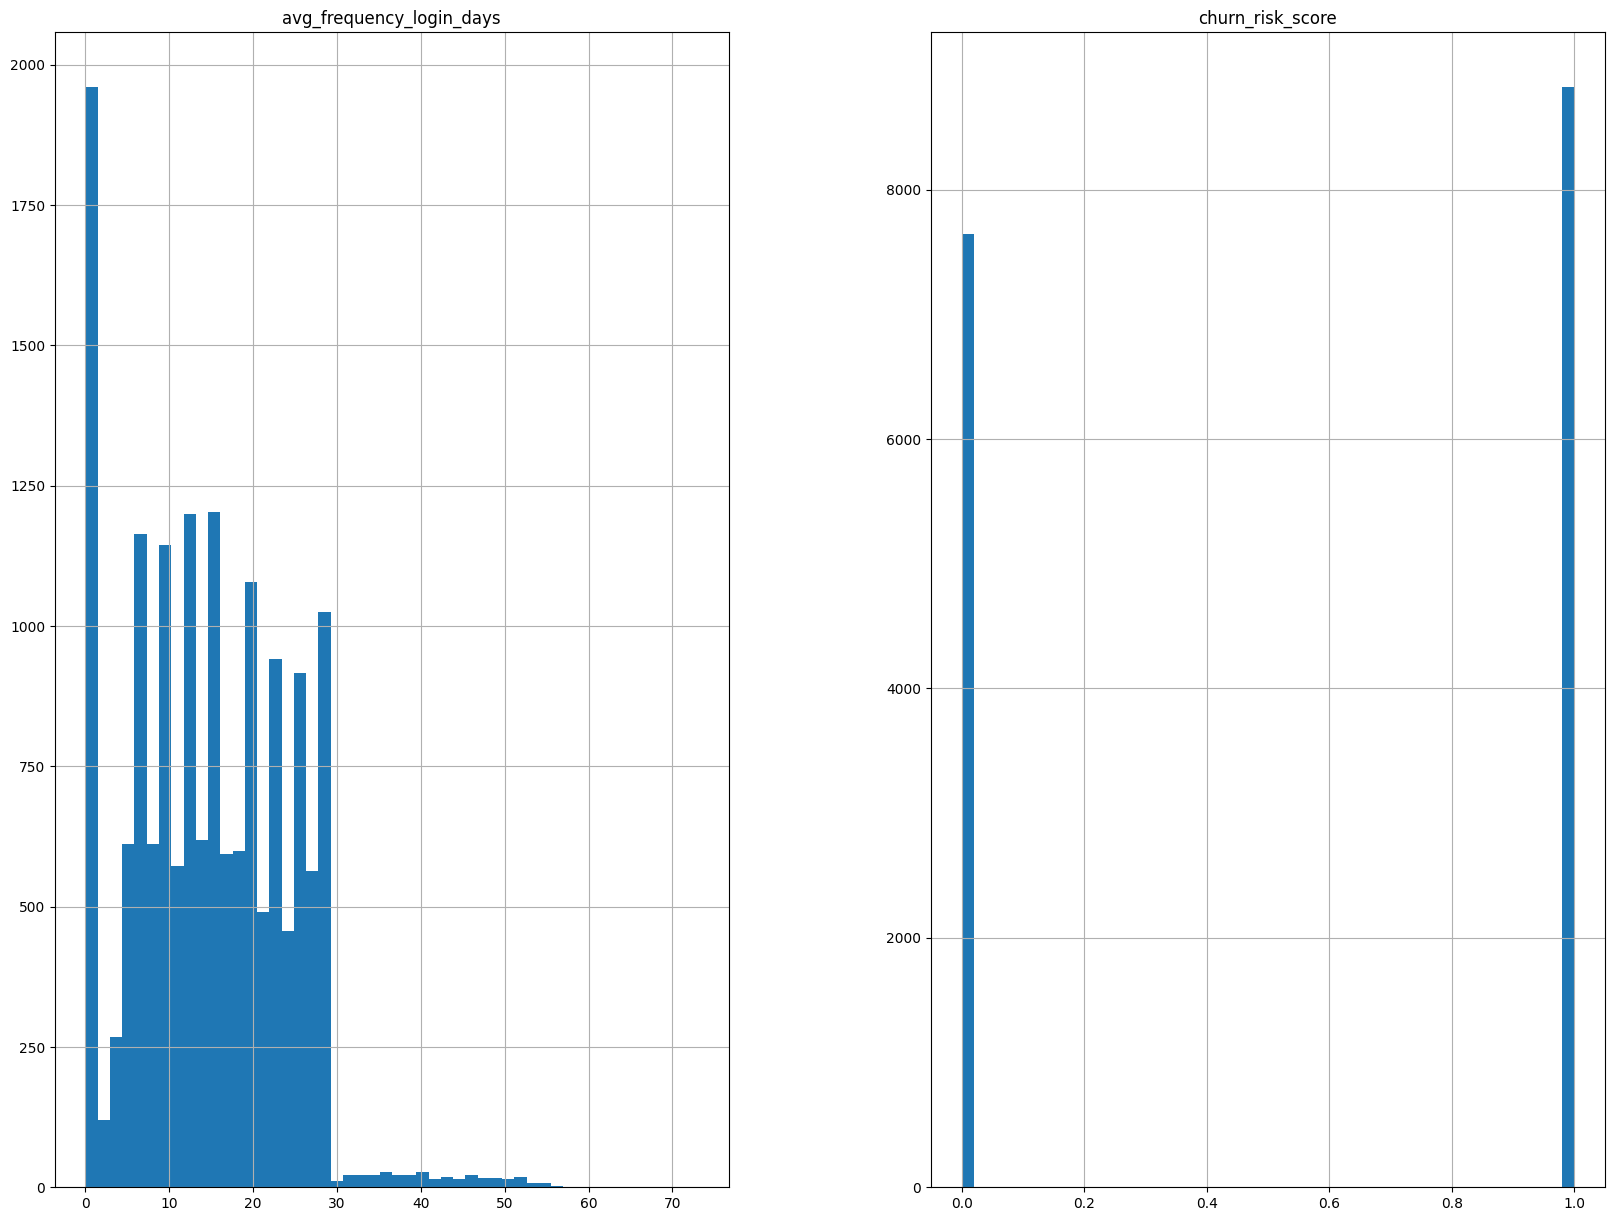

In [39]:
churn_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [40]:
churn_train[['avg_frequency_login_days']].skew()

avg_frequency_login_days    0.375442
dtype: float64

`since the only numerical feature we have is average frwquency login days, we check its outliers and turns out its normal`

### Model Definition

`splitting the features and target`

In [41]:
# Feature & Target selection
X_train = churn_train.drop(columns=['churn_risk_score']) # Features
y_train = churn_train['churn_risk_score'] # Target

X_val = churn_val.drop(columns=['churn_risk_score']) # Features
y_val = churn_val['churn_risk_score'] # Target

X_test = churn_test.drop(columns=['churn_risk_score']) # Features
y_test = churn_test['churn_risk_score'] # Target


`divided numerical and categorical columns`

In [42]:
# Splitting numerical column dan categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_frequency_login_days']
Categorical Columns :  ['membership_category', 'feedback']


`making the pipeline and then combine into 1 final pipeline`

In [43]:
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(sparse=False))

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [44]:
final_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['avg_frequency_login_days']),
                                ('pipe_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse=False))]),
                                 ['membership_category', 'feedback'])])

In [45]:
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')

X_train shape: (16461, 16)
X_val shape: (4116, 16)


### Input Pipeline

In [47]:
df_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(27)
df_val = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(27)

## Sequential API
### Model Definition

In [48]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [49]:
# Model sequential
model_sequential = Sequential()
model_sequential.add(Dense(10, activation='relu', input_shape=(16,))) # Hidden Layer 1
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [50]:
# Train the Model
history_seq = model_sequential.fit(df_train,
                                   epochs=30,
                                   validation_data=df_val,
                                   batch_size=32)

Epoch 1/30
610/610 [==============================] - 4s 4ms/step - loss: 0.4731 - accuracy: 0.7732 - val_loss: 0.2900 - val_accuracy: 0.8445
Epoch 2/30
610/610 [==============================] - 1s 2ms/step - loss: 0.2746 - accuracy: 0.8463 - val_loss: 0.2596 - val_accuracy: 0.8397
Epoch 3/30
610/610 [==============================] - 2s 3ms/step - loss: 0.2631 - accuracy: 0.8461 - val_loss: 0.2558 - val_accuracy: 0.8501
Epoch 4/30
610/610 [==============================] - 2s 3ms/step - loss: 0.2606 - accuracy: 0.8482 - val_loss: 0.2536 - val_accuracy: 0.8506
Epoch 5/30
610/610 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.8466 - val_loss: 0.2538 - val_accuracy: 0.8431
Epoch 6/30
610/610 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 0.8445 - val_loss: 0.2533 - val_accuracy: 0.8516
Epoch 7/30
610/610 [==============================] - 2s 2ms/step - loss: 0.2587 - accuracy: 0.8444 - val_loss: 0.2542 - val_accuracy: 0.8387
Epoch 

In [51]:
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.473111,0.773222,0.290030,0.844509
1,0.274644,0.846303,0.259612,0.839650
2,0.263094,0.846060,0.255768,0.850097
3,0.260597,0.848247,0.253646,0.850583
4,0.259309,0.846607,0.253822,0.843051
5,0.259140,0.844481,0.253328,0.851555
6,0.258669,0.844359,0.254161,0.838678
7,0.258605,0.844845,0.253712,0.840622
8,0.258277,0.843570,0.253817,0.847668
9,0.258199,0.847518,0.253400,0.847911


<Axes: >

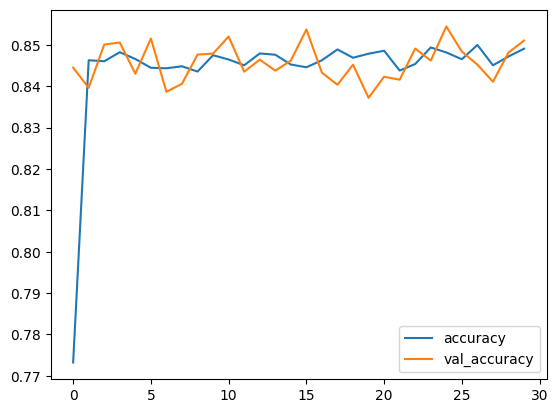

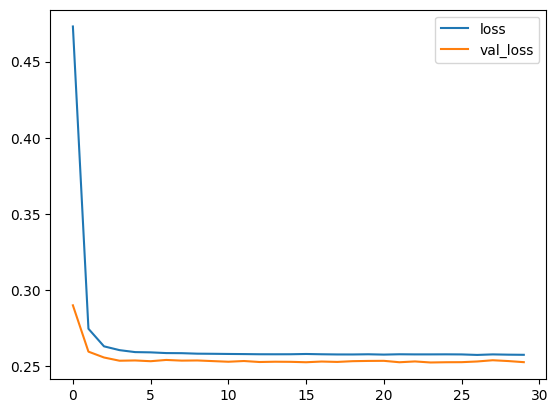

In [52]:
# Plot Traning Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [53]:
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

72/72 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1062
           1       0.89      0.82      0.85      1225

    accuracy                           0.85      2287
   macro avg       0.85      0.85      0.85      2287
weighted avg       0.85      0.85      0.85      2287



`from base mode sequential, the accuracy is already 85%, it already categorized as a good model but these two line from the plot isnt huddle. the reason why i use accuracy as my standard because i want to see from every aspect `

## Functional API
### Model Definition

In [54]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [55]:
#Functional model
input_layer = Input(shape=(16,))
hidden_layer1 = Dense(10, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer1)
model_functional = Model(inputs=input_layer, outputs=output_layer)

In [56]:
# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

history_func = model_functional.fit(df_train,
                                    epochs=30,
                                    validation_data=df_val,
                                    batch_size=32)

Epoch 1/30
610/610 [==============================] - 2s 2ms/step - loss: 0.4521 - accuracy: 0.8016 - val_loss: 0.2874 - val_accuracy: 0.8506
Epoch 2/30
610/610 [==============================] - 1s 2ms/step - loss: 0.2748 - accuracy: 0.8473 - val_loss: 0.2591 - val_accuracy: 0.8513
Epoch 3/30
610/610 [==============================] - 2s 3ms/step - loss: 0.2636 - accuracy: 0.8459 - val_loss: 0.2565 - val_accuracy: 0.8409
Epoch 4/30
610/610 [==============================] - 2s 3ms/step - loss: 0.2607 - accuracy: 0.8473 - val_loss: 0.2546 - val_accuracy: 0.8440
Epoch 5/30
610/610 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.8448 - val_loss: 0.2534 - val_accuracy: 0.8499
Epoch 6/30
610/610 [==============================] - 1s 2ms/step - loss: 0.2589 - accuracy: 0.8475 - val_loss: 0.2542 - val_accuracy: 0.8375
Epoch 7/30
610/610 [==============================] - 1s 2ms/step - loss: 0.2586 - accuracy: 0.8479 - val_loss: 0.2531 - val_accuracy: 0.8491
Epoch 

In [57]:
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.452083,0.801592,0.287378,0.850583
1,0.274753,0.847275,0.259135,0.851312
2,0.263577,0.845878,0.256545,0.840865
3,0.260659,0.847275,0.254585,0.844023
4,0.259754,0.844785,0.253399,0.849854
5,0.258872,0.847458,0.254218,0.837464
6,0.258627,0.847883,0.253052,0.849125
7,0.258404,0.844906,0.253663,0.852284
8,0.258460,0.846789,0.253413,0.837464
9,0.258035,0.845939,0.253061,0.850583


<Axes: >

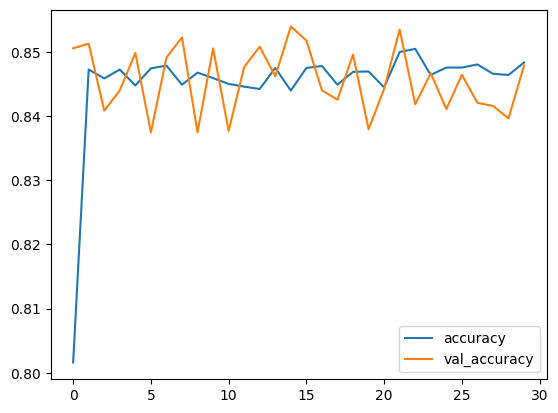

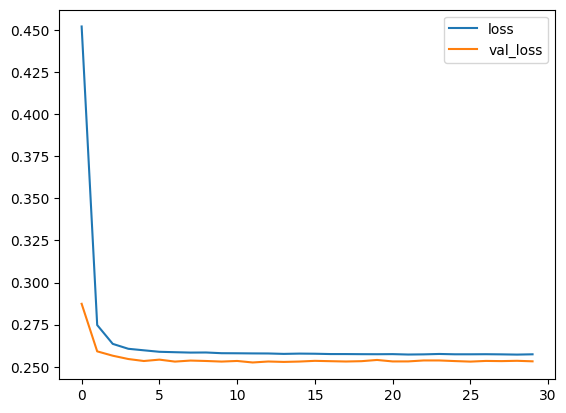

In [59]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [60]:
# Evaluate Test-Set
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

72/72 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1062
           1       0.88      0.85      0.86      1225

    accuracy                           0.86      2287
   macro avg       0.86      0.86      0.86      2287
weighted avg       0.86      0.86      0.86      2287



`from functional mode, eventho the accuracy is growing higher, into 86% but from the plot our model is considered as underfitting because the val accuracy is higher than the accuracy line`

## Model Improvement
### Sequential

In [61]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [62]:
model_seq_imp = Sequential()
model_seq_imp.add(Dense(10, activation="relu", input_shape=(16,))) # hidden layer 1
model_seq_imp.add(Dense(8, activation="relu")) # hidden layer 2
model_seq_imp.add(Dense(1, activation='sigmoid')) # Output Layer

In [63]:
# Compile
model_seq_imp.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

In [64]:
# Train the Model
history_seq_imp = model_seq_imp.fit(df_train,
                                   epochs=50,
                                   validation_data=df_val,
                                   batch_size=32
                                   )

Epoch 1/50
610/610 [==============================] - 2s 3ms/step - loss: 0.4295 - accuracy: 0.7882 - val_loss: 0.2689 - val_accuracy: 0.8416
Epoch 2/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.8450 - val_loss: 0.2578 - val_accuracy: 0.8482
Epoch 3/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2615 - accuracy: 0.8456 - val_loss: 0.2555 - val_accuracy: 0.8433
Epoch 4/50
610/610 [==============================] - 2s 3ms/step - loss: 0.2600 - accuracy: 0.8448 - val_loss: 0.2561 - val_accuracy: 0.8421
Epoch 5/50
610/610 [==============================] - 2s 3ms/step - loss: 0.2593 - accuracy: 0.8439 - val_loss: 0.2550 - val_accuracy: 0.8460
Epoch 6/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 0.8455 - val_loss: 0.2543 - val_accuracy: 0.8423
Epoch 7/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2588 - accuracy: 0.8470 - val_loss: 0.2534 - val_accuracy: 0.8435
Epoch 

In [65]:
model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [66]:
history_seq_imp_df = pd.DataFrame(history_seq_imp.history)
history_seq_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.429490,0.788227,0.268930,0.841594
1,0.266460,0.844967,0.257769,0.848154
2,0.261547,0.845635,0.255488,0.843294
3,0.260027,0.844845,0.256142,0.842080
4,0.259255,0.843873,0.254981,0.845967
5,0.259096,0.845453,0.254258,0.842323
6,0.258818,0.846972,0.253385,0.843537
7,0.258482,0.846729,0.253776,0.851069
8,0.258464,0.845757,0.252549,0.850583
9,0.258440,0.844359,0.252980,0.845238


<Axes: >

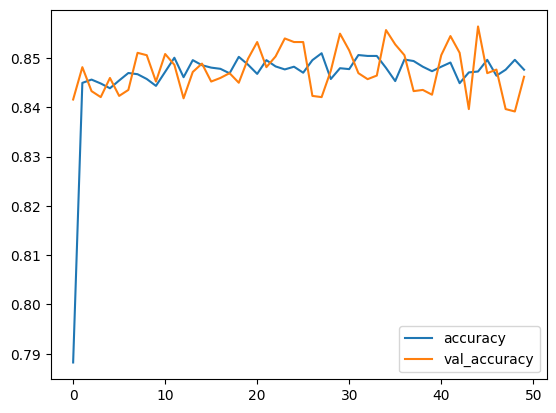

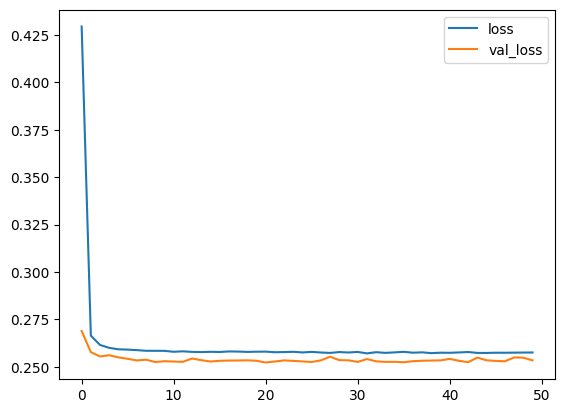

In [67]:
# Plot Traning Results

history_seq_imp_df[['accuracy', 'val_accuracy']].plot()
history_seq_imp_df[['loss', 'val_loss']].plot()

In [68]:
y_pred_seq_imp = model_seq_imp.predict(X_test)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_imp))

72/72 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1062
           1       0.83      0.90      0.86      1225

    accuracy                           0.85      2287
   macro avg       0.85      0.84      0.85      2287
weighted avg       0.85      0.85      0.85      2287



`there is actually no improvement from the last model, it still 85% but from the plot these two line is closer than before so it consider as a good model`

### Functional

In [69]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [70]:
# Create Functional Model

input_layer_imp = Input(shape=(16,))
hidden_layer1_imp = Dense(10, activation='relu')(input_layer_imp)
hidden_layer2_imp = Dense(10, activation='relu')(hidden_layer1_imp)
hidden_layer3_imp = Dense(8, activation='relu')(hidden_layer2_imp)


concat_layer_imp = concatenate([input_layer_imp, hidden_layer3_imp])
output_layer_imp = Dense(1, activation='sigmoid')(concat_layer_imp)

model_func_imp = Model(inputs=input_layer_imp, outputs=output_layer_imp)

# Compile
model_func_imp.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

In [71]:
# Train the Model
history_func_imp = model_func_imp.fit(df_train,
                                   epochs=50,
                                   validation_data=df_val,
                                   batch_size=32)

Epoch 1/50
610/610 [==============================] - 3s 2ms/step - loss: 0.4182 - accuracy: 0.7628 - val_loss: 0.2626 - val_accuracy: 0.8503
Epoch 2/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.8434 - val_loss: 0.2544 - val_accuracy: 0.8462
Epoch 3/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2609 - accuracy: 0.8441 - val_loss: 0.2541 - val_accuracy: 0.8460
Epoch 4/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2594 - accuracy: 0.8476 - val_loss: 0.2524 - val_accuracy: 0.8540
Epoch 5/50
610/610 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.8476 - val_loss: 0.2536 - val_accuracy: 0.8540
Epoch 6/50
610/610 [==============================] - 2s 4ms/step - loss: 0.2592 - accuracy: 0.8439 - val_loss: 0.2537 - val_accuracy: 0.8428
Epoch 7/50
610/610 [==============================] - 2s 3ms/step - loss: 0.2583 - accuracy: 0.8518 - val_loss: 0.2528 - val_accuracy: 0.8457
Epoch 

In [72]:
model_func_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 10)           170         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           110         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 8)            88          ['dense_1[0][0]']                
                                                                                              

In [73]:
model_func_imp_df = pd.DataFrame(history_func_imp.history)
model_func_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.418154,0.762833,0.262558,0.850340
1,0.264458,0.843448,0.254392,0.846210
2,0.260861,0.844116,0.254126,0.845967
3,0.259436,0.847579,0.252439,0.853984
4,0.258694,0.847579,0.253603,0.853984
5,0.259191,0.843873,0.253729,0.842809
6,0.258262,0.851832,0.252828,0.845724
7,0.258638,0.846850,0.253028,0.845724
8,0.258190,0.849098,0.253238,0.848154
9,0.258470,0.847397,0.254316,0.839407


<Axes: >

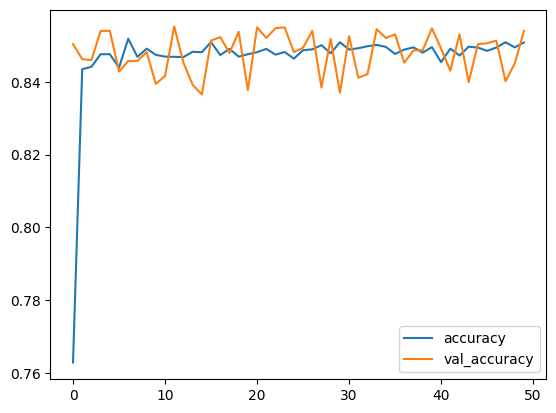

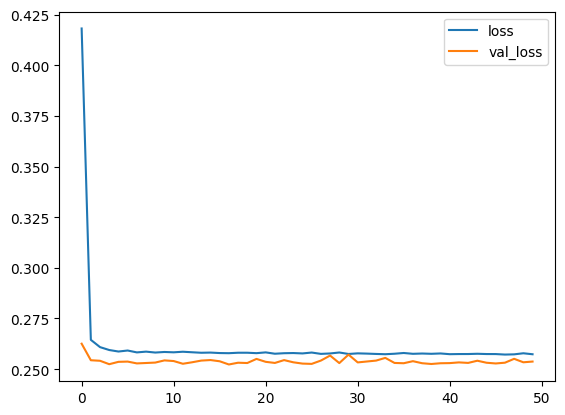

In [74]:
# Plot Traning Results

model_func_imp_df[['accuracy', 'val_accuracy']].plot()
model_func_imp_df[['loss', 'val_loss']].plot()

In [75]:
y_pred_func_imp = model_func_imp.predict(X_test)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_imp))

72/72 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      1062
           1       0.95      0.79      0.86      1225

    accuracy                           0.86      2287
   macro avg       0.87      0.87      0.86      2287
weighted avg       0.88      0.86      0.86      2287



`model functional also doesnt improve a lot but from the line plot is much closer than before`

## Model Saving

In [76]:
# Save Pipeline
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [77]:
# Freezing
model_seq_imp.trainable = False
model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 267
Trainable params: 0
Non-trainable params: 267
_________________________________________________________________


In [78]:
# Save ANN Model

model_seq_imp.save('seqimp_model.h5')

## Overall Analysis

- ` 1 is represent as custmer who is churn and the other one is not. 20018 customer has decided to churn than number zero that only has 16992. this is indicates our data could be recognized as a balance data and if we make it into percentages, number 1 has 54.1% than number 0 has 45.9%`
- `our customer has huge range of age, the youngest start from 10 years old and the oldest is more than 60 years old. red line means the average of age and the green line means mode of age column. these 2 line huddle around 38 years old. the orange line bar is represent as customer who churn and the blue one is customer that are loyal. from bar above, at many age, customer tendly to churn.`
- `we got female and male population kinda balance in this data. but when we make it into percentage of churn, customer tend to be not loyal enough of our company. female has 54.3% to churn and male 53.9 to churn`
- `the biggest folk in our data customer is they are wo dont have membership or no membership. whne we look into membership category affected churn score, we got the result that most of customer who are not loyal are come from no membership and basic membership section. but for premium and platinum membership, the churn score is zero`
- `many customer who has highly churn score are coming for bad feedback segmention. this is really defferent when we look into good feedback segmention, no one has indicates as churn. but in general, most of feeedback are categorized as bad feedback`
- `it seems like whatever our customer  internet option, the churn score always happens in all of the segment`
- `past complain suprisingly doesnt affected churn score. whenever customer has given a complaint or not, the churn always happens in these 2 segments. when we make it into percentage, it equals`

## Model Analysis

- `from base mode sequential, the accuracy is already 85%, it already categorized as a good model but these two line from the plot isnt huddle. the reason why i use accuracy as my standard because i want to see from every aspect `
- `from functional mode, eventho the accuracy is growing higher, into 86% but from the plot our model is considered as underfitting because the val accuracy is higher than the accuracy line`
- `there is actually no improvement from the last model in sequential improvement, it still 85% but from the plot these two line is closer than before so it consider as a good model`
- `model functional improvement also doesnt improve a lot but from the line plot is much closer than before`